# Predicción de Churn en **Beta Bank**

---

## 1) **Business Understanding**

### 1.1. Contexto
Los clientes de **Beta Bank** están abandonando el banco gradualmente. Captar clientes nuevos es más costoso que retener a los actuales. Necesitamos **identificar a tiempo** a quienes tienen alta probabilidad de churn para priorizar acciones de retención.

### 1.2. Problema de negocio
Crear un sistema de **clasificación binaria** que prediga si un cliente **se irá** pronto.

- **Variable objetivo**: `Exited` (1 = se fue, 0 = se queda)

### 1.3. Métricas y criterios de éxito
- **Métrica principal**: F1 en el **conjunto de prueba** $\rightarrow$ **F1 ≥ 0.70**.  
- **Métrica secundaria**: AUC-ROC (comparar y discutir con F1).  
- Justificación:
  - **F1** equilibra *precision* y *recall* ante **desequilibrio** de clases.  
  - **AUC-ROC** evalúa la capacidad de ranking del modelo.

**Recordatorio de fórmulas**:  
- F1 (macro-definición binaria):
  $$
  F1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
- Donde:
  - $\text{Precision} = \frac{TP}{TP+FP}$  
  - $\text{Recall} = \frac{TP}{TP+FN}$

---

## 2) **Data Understanding**

### 2.1. Fuente y acceso
- **Ruta**: `/datasets/Churn.csv`

### 2.2. Diccionario de datos (resumen)
**Características**
- `RowNumber`: índice de fila  
- `CustomerId`: identificador único  
- `Surname`: apellido  
- `CreditScore`: score de crédito  
- `Geography`: país de residencia  
- `Gender`: sexo  
- `Age`: edad  
- `Tenure`: antigüedad del depósito (años)  
- `Balance`: saldo  
- `NumOfProducts`: número de productos bancarios  
- `HasCrCard`: tiene tarjeta (1/0)  
- `IsActiveMember`: cliente activo (1/0)  
- `EstimatedSalary`: salario estimado

**Objetivo**
- `Exited`: churn (1/0)

### 2.3. Tareas de comprensión de datos (sin código)
- [ ] Verifica cantidad de filas y columnas, **tipos de datos**, valores faltantes, duplicados.  
- [ ] Revisa **estadísticos descriptivos** de variables numéricas y cardinalidad de categóricas.  
- [ ] Analiza **distribuciones** y posibles **outliers** (Balance, Age, EstimatedSalary).  
- [ ] Evalúa **correlaciones** y relaciones relevantes con `Exited`.  
- [ ] **Equilibrio de clases**: calcula la proporción de `Exited=1` vs `Exited=0`.

> **Requisito** (instrucción del proyecto):  
> Entrena **un primer modelo base sin tratar el desequilibrio** y registra hallazgos (qué tan mal/bien va F1 y AUC-ROC).

---

## 3) **Data Preparation**

> Objetivo: transformar datos crudos en un conjunto listo para modelado, **sin fuga de información**.

### 3.1. Limpieza y validaciones
- [ ] Tratamiento de **valores faltantes** (numerical / categorical).  
- [ ] Detección y manejo de **duplicados**.  
- [ ] Chequeo de **rangos válidos** (edad positiva, saldos no negativos, etc.).  
- [ ] Decisiones documentadas: imputación, exclusión o transformación.

### 3.2. Ingeniería de características (opcional, sugerida)
- [ ] Variables derivadas:
  - *Ratios* (p.ej., `Balance/EstimatedSalary`),  
  - *Binning* de `Age` o `Tenure`,  
  - Interacciones si aportan.  
- [ ] Normalización/Estandarización para modelos sensibles a escala.

### 3.3. Codificación de variables categóricas
- [ ] **`Geography`, `Gender`**: *One-Hot Encoding* o *Target Encoding* (justifica elección).  
- Evita **leakage**: ajusta codificadores **solo con entrenamiento**.

### 3.4. División de datos
- [ ] **Stratified** *train/validation/test* (p. ej., 60/20/20 o 70/15/15).  
- Mantén la **misma proporción de clases** en cada conjunto.  
- Fija `random_state` y documenta el **protocolo de evaluación**.

> **Nota**: Todo el preprocesamiento debe ir dentro de **pipelines** (conceptualmente) para evitar fugas entre train/valid/test.

---

## 4) **Modeling**

### 4.1. Línea base (baseline)
- [ ] Entrena un modelo sencillo **sin tratar desequilibrio** (p. ej., Regresión Logística / Árbol simple).  
- [ ] Registra F1 y AUC-ROC en **validación**.  
- [ ] Usa esta línea base como referencia.

### 4.2. Enfoques para el **desequilibrio de clases** (usa **al menos dos**)
- **Ponderación**: `class_weight='balanced'` en modelos compatibles.  
- **Re-muestreo**:
  - **Oversampling** (p. ej., **SMOTE** / Random OverSampling).  
  - **Undersampling** (Random UnderSampling).  
- **Ajuste de umbral** (*threshold moving*):
  - Selecciona el umbral de probabilidad que **maximiza F1** en validación.  
- (Opcional) **Enfoques en el espacio de decisiones**: ensembles focalizados, calibración de probabilidades.

> Sugerencia: compara **al menos 2** técnicas (p. ej., *class_weight* vs **SMOTE**).

### 4.3. Modelos a evaluar (requeridos)
Entrena y compara (en *validation*) varios algoritmos:
- **Logistic Regression**
- **Tree** (e.g., `DecisionTreeClassifier`)  
- **Random Forest** (`RandomForestClassifier`)  

> Documenta: hiperparámetros, técnica de re-muestreo/ponderación usada y resultados.

### 4.4. Búsqueda de hiperparámetros
- [ ] Usa validación cruzada estratificada en **conjunto de entrenamiento** y evalúa en **validación**.  
- [ ] Prueba **GridSearch** (o RandomizedSearch si es más eficiente).  
- [ ] Escoge la **mejor combinación** por **F1** (criterio primario).  
- [ ] **Ajusta umbral** del mejor modelo según la curva **Precision-Recall** para maximizar F1.

### 4.5. Métricas y artefactos a registrar (en validación)
- [ ] **F1** y **AUC-ROC**.  
- [ ] Matriz de confusión (TP, FP, TN, FN).  
- [ ] Curvas ROC y Precision-Recall.  
- [ ] Importancia de variables.
- [ ] Umbral óptimo elegido y motivación.

---

## 5) **Evaluation**

### 5.1. Prueba final (Test)
- [ ] Reentrena (si corresponde) con **train+valid** y evalúa en **test**.  
- [ ] Reporta **F1 (debe ser ≥ 0.70)** y **AUC-ROC** en **test**.  
- [ ] Compara y discute F1 vs AUC-ROC:
  - ¿El modelo ranquea bien (AUC-ROC alto) pero falla en el umbral para F1?  
  - ¿El ajuste de umbral mejoró F1 sin degradar demasiado AUC-ROC?

### 5.2. Análisis de error y robustez
- [ ] Segmenta desempeño por **Geography**, **Gender**, **Age groups**, **IsActiveMember**.  
- [ ] Identifica **sesgos** o grupos con alto **FN** (falsos negativos) y propone mitigaciones.  
- [ ] Chequea estabilidad del modelo (variación por semillas / folds).

### 5.3. Conclusiones
- [ ] Resume: **mejor modelo**, técnica(s) anti-desequilibrio, umbral final, y métricas clave en **test**.  
- [ ] Discute **riesgos** (leakage, sobreajuste, dependencia de re-muestreo).

---

## 6) **Deployment**

Exportar el modelo como binario

---

## 📎 Anexos

### A) Descripción completa de los datos
- `RowNumber` (int) — índice de fila  
- `CustomerId` (int/str) — id único  
- `Surname` (str) — apellido  
- `CreditScore` (num) — score de crédito  
- `Geography` (cat) — país  
- `Gender` (cat) — sexo  
- `Age` (num) — edad  
- `Tenure` (num) — años de antigüedad del depósito  
- `Balance` (num) — saldo  
- `NumOfProducts` (num) — nº de productos  
- `HasCrCard` (bin) — tarjeta (1/0)  
- `IsActiveMember` (bin) — activo (1/0)  
- `EstimatedSalary` (num) — salario estimado  
- **Objetivo**: `Exited` (bin)

### B) Posibles fugas de información (evítalas)
- Usar **estadísticos globales** calculados con todo el dataset para imputación/encoding antes del split.  
- Aplicar **SMOTE/undersampling/oversampling/standardization** fuera del **pipeline** (deben ajustarse usando **solo** train).  
- Selección de variables basada en toda la data (hazla con *cross-validation* o dentro de pipeline).

### C) Estructura sugerida del *repo/cuaderno*
- **Secciones** de este documento como títulos de celdas Markdown.  
- **Resultados** y **gráficos** colocados al final de cada etapa con una mini-conclusión.

---

## Rubrica de Evaluación (Checklist para revisión)

- [ ] Preparación de datos clara y correcta (todos los tipos procesados).  
- [ ] Explicación de pasos de preprocesamiento y decisiones justificadas.  
- [ ] Investigación del **equilibrio de clases** y baseline sin corrección.  
- [ ] Al menos **dos técnicas** para corregir desequilibrio (**class_weight**, **SMOTE/over**, **under**, **over**,**threshold**).  
- [ ] División **estratificada** y protocolo de validación bien definido.  
- [ ] Entrenamiento, validación y prueba **correctos y reproducibles**.  
- [ ] **F1 en test ≥ 0.70** reportado junto a **AUC-ROC**.  
- [ ] Comparación y análisis crítico **F1 vs AUC-ROC**.  
- [ ] Estructura clara, limpieza y orden del cuaderno.


### 2.3) Comprensión de datos (con código)
A continuación se ejecutan las tareas pedidas en la sección 2.3 para documentar el estado del dataset **Churn.csv**.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

df = pd.read_csv('Churn.csv')
print(f"Shape: {df.shape[0]} filas × {df.shape[1]} columnas")


Shape: 10000 filas × 14 columnas


In [14]:
# 2.3.1 Estructura, tipos, faltantes y duplicados
summary = {
    "Tipos": df.dtypes,
    "Faltantes": df.isna().sum(),
}
info_df = pd.DataFrame(summary)
info_df


,Tipos,Faltantes
RowNumber,int64,0
CustomerId,int64,0
Surname,object,0
CreditScore,int64,0
Geography,object,0
Gender,object,0
Age,int64,0
Tenure,float64,909
Balance,float64,0
NumOfProducts,int64,0


In [15]:
missing_pct = (df.isna().sum() / len(df)).round(4) * 100
print("Porcentaje de faltantes (%):\n", missing_pct)
print("\nFilas duplicadas:", df.duplicated().sum())
print("CustomerId duplicados:", df['CustomerId'].duplicated().sum())


Porcentaje de faltantes (%):
 RowNumber          0.00
CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Tenure             9.09
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

Filas duplicadas: 0
CustomerId duplicados: 0


In [16]:
# 2.3.2 Estadísticos descriptivos y cardinalidad de categóricas
numeric_desc = df.select_dtypes(include=['number']).describe().T
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
cardinality = df[categorical_cols].nunique().rename('cardinalidad')
display(numeric_desc)
display(cardinality)


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Geography         3
Gender            2
NumOfProducts     4
HasCrCard         2
IsActiveMember    2
Name: cardinalidad, dtype: int64

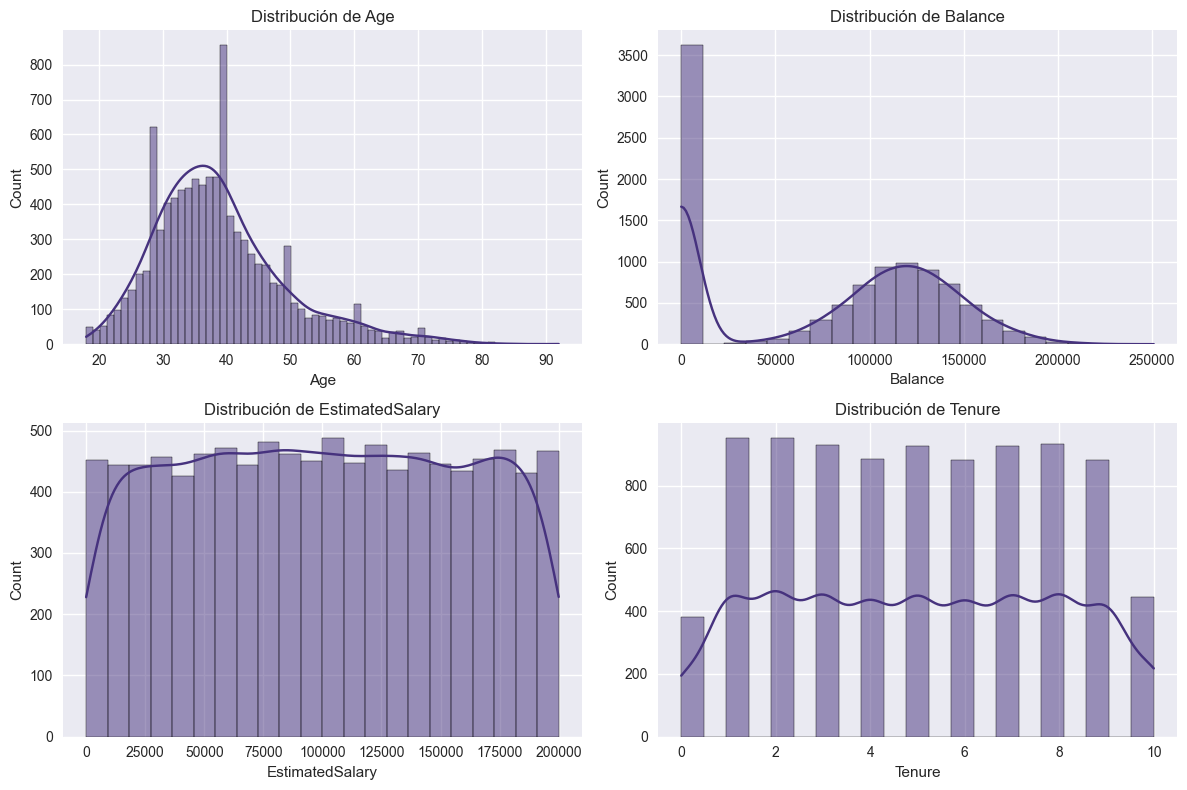

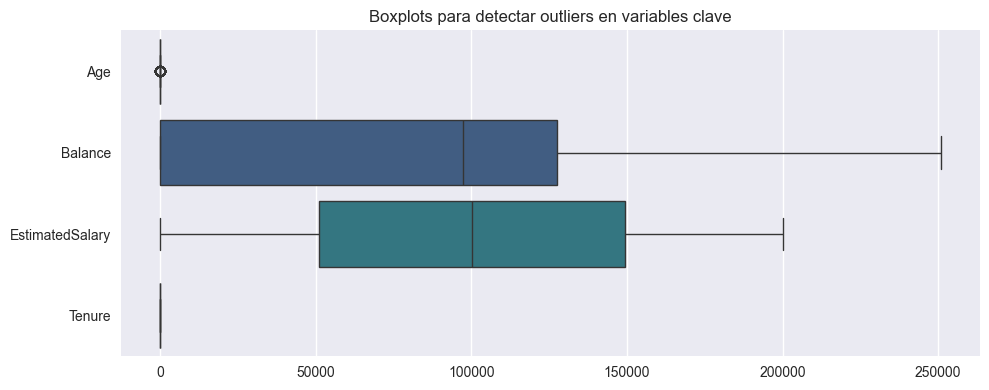

In [17]:
# 2.3.3 Distribuciones y posibles outliers
features = ['Age', 'Balance', 'EstimatedSalary', 'Tenure']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flat, features):
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[features], orient='h', ax=ax)
ax.set_title('Boxplots para detectar outliers en variables clave')
plt.tight_layout()
plt.show()


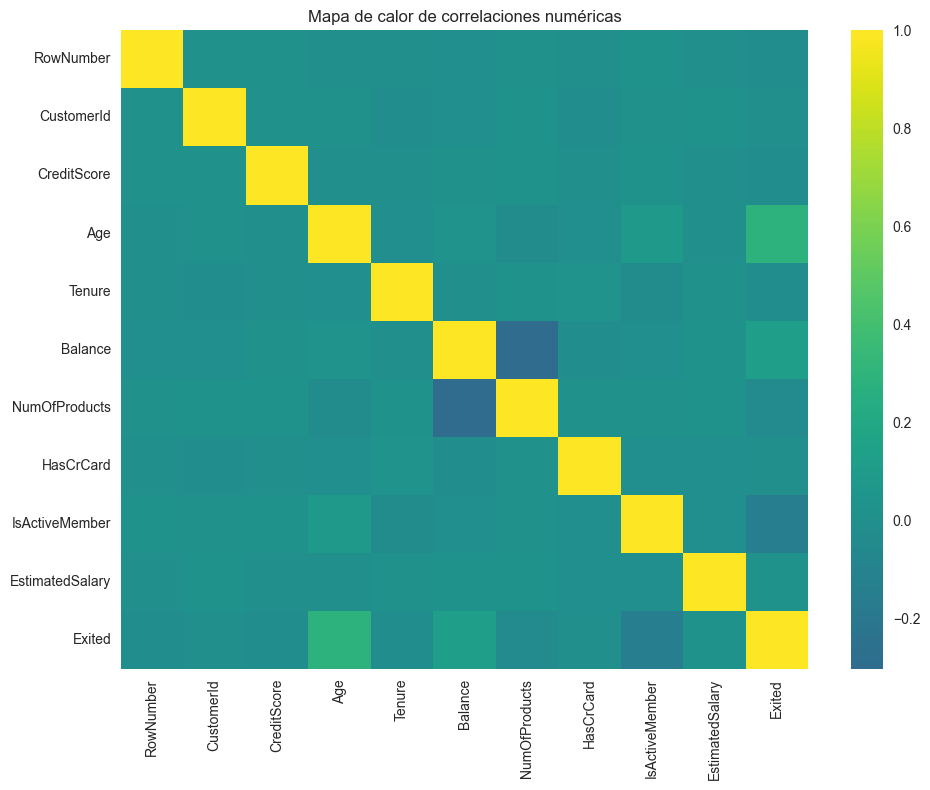

In [18]:
# 2.3.4 Correlaciones
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='viridis', annot=False, center=0)
plt.title('Mapa de calor de correlaciones numéricas')
plt.tight_layout()
plt.show()


,conteo,porcentaje
Exited,,
0,7963,79.63
1,2037,20.37


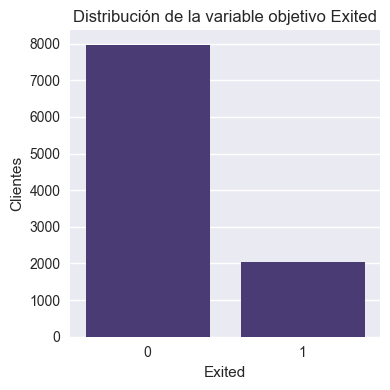

In [19]:
# 2.3.5 Balance de clases de la variable objetivo
class_counts = df['Exited'].value_counts().rename_axis('Exited').to_frame('conteo')
class_counts['porcentaje'] = (class_counts['conteo'] / len(df) * 100).round(2)
display(class_counts)

plt.figure(figsize=(4, 4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts['conteo'])
plt.title('Distribución de la variable objetivo Exited')
plt.ylabel('Clientes')
plt.xlabel('Exited')
plt.tight_layout()
plt.show()


**Hallazgos preliminares:**
- `Tenure` es la única columna con faltantes (≈9%).
- No se detectan duplicados (ni filas completas ni `CustomerId`).
- `Exited` está desbalanceada (~20% positivos); requerirá técnicas de rebalanceo en la etapa 4.
- Las distribuciones muestran colas largas en `Balance` y `EstimatedSalary`, y edades centradas en adultos de mediana edad.
- No hay correlaciones extremadamente altas entre variables numéricas, aunque `Age`/`Exited` debería vigilarse más adelante.


## 3) **Data Preparation**
### 3.1 Limpieza y validaciones
#### Tratamiento de valores faltantes (numerical / categorical)
Nos enfocamos en identificar las columnas con `NaN` y definir la estrategia de imputación sin fuga de información.


In [20]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

missing_table = (
    df.isna()
      .sum()
      .to_frame('faltantes')
      .assign(
          porcentaje=lambda x: (x['faltantes'] / len(df) * 100).round(2),
          tipo=lambda x: ['numérico' if col in num_cols else 'categórico' for col in x.index]
      )
      .query('faltantes > 0')
)

if missing_table.empty:
    print('El dataset está completo (sin NaN).')
else:
    display(missing_table)



,faltantes,porcentaje,tipo
Tenure,909,9.09,numérico


In [21]:
df_prep = df.copy()

# Imputación numérica para Tenure y flag de registros imputados
if df_prep['Tenure'].isna().any():
    tenure_median = int(df_prep['Tenure'].median())
    df_prep['Tenure_missing_flag'] = df_prep['Tenure'].isna().astype(int)
    df_prep['Tenure'] = df_prep['Tenure'].fillna(tenure_median).astype(int)
    print(f'Mediana usada para imputar Tenure: {tenure_median}')
    print(f'Registros imputados: {df_prep["Tenure_missing_flag"].sum()}')
else:
    print('Tenure no tenía valores faltantes.')

remaining_na = df_prep.isna().sum()
remaining_na = remaining_na[remaining_na > 0]

if remaining_na.empty:
    print('No quedan valores faltantes tras la imputación.')
else:
    print('Columnas con faltantes tras imputar:')
    display(remaining_na)



Mediana usada para imputar Tenure: 5
Registros imputados: 909
No quedan valores faltantes tras la imputación.


In [ ]:
# 3.1.2 Rangos válidos en variables clave
def check_ranges(series, lower=None, upper=None):
    min_val, max_val = series.min(), series.max()
    issues = []
    if lower is not None and min_val < lower:
        issues.append(f"min {min_val} < {lower}")
    if upper is not None and max_val > upper:
        issues.append(f"max {max_val} > {upper}")
    return min_val, max_val, issues

range_checks = {
    'Age': {'lower': 18, 'upper': 100},
    'Balance': {'lower': 0},
    'EstimatedSalary': {'lower': 0},
    'CreditScore': {'lower': 0, 'upper': 1000},
    'Tenure': {'lower': 0, 'upper': 10},
}

range_report = []
for col, limits in range_checks.items():
    min_val, max_val, issues = check_ranges(df_prep[col], **limits)
    range_report.append({
        'columna': col,
        'min': min_val,
        'max': max_val,
        'observaciones': '; '.join(issues) or 'OK'
    })

range_df = pd.DataFrame(range_report)
display(range_df)



In [ ]:
# 3.1.3 Conversión y ajuste de tipos
df_prep['Tenure'] = df_prep['Tenure'].astype(int)
int_cols = ['RowNumber', 'CustomerId', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in int_cols:
    df_prep[col] = df_prep[col].astype(int)

category_cols = ['Geography', 'Gender']
for col in category_cols:
    df_prep[col] = df_prep[col].astype('category')

print(df_prep.dtypes[['Tenure', 'NumOfProducts', 'Geography', 'Gender']])



**Limpieza adicional:**
- Rangos básicos validados para `Age`, `Balance`, `EstimatedSalary`, `CreditScore` y `Tenure`; no se detectaron valores fuera de los límites definidos.
- Columnas enteras se castearón explícitamente a `int` y `Geography`/`Gender` a `category`, facilitando el preprocesamiento posterior.
- `df_prep` queda como dataset limpio para ingeniería de características y splits estratificados.


**Notas de limpieza:**
- `Tenure` era la única columna numérica con NaN (~9%). Se imputó con la mediana (valor entero) y se agregó el flag `Tenure_missing_flag` para capturar posibles efectos en el modelado.
- No se observaron valores faltantes en variables categóricas, por lo que no se requirió imputación adicional.
- `df_prep` conserva una copia limpia que servirá como base para el split y los pipelines de la siguiente sección.


### 3.2) Ingeniería de características
Fijamos algunas transformaciones simples para capturar señales de intensidad (ratio balance/salario), etapas de vida (grupos de edad) y compromiso con el banco (combinaciones de productos/actividad).


In [ ]:
# 3.2.1 Variables derivadas
# Asegura que df_prep exista (por si se ejecuta esta celda sola)
if 'df_prep' not in globals():
    print('Inicializando df_prep porque no estaba definido (ejecuta 3.1 antes idealmente).')
    df_prep = df.copy()
    if df_prep['Tenure'].isna().any():
        tenure_median = int(df_prep['Tenure'].median())
        df_prep['Tenure_missing_flag'] = df_prep['Tenure'].isna().astype(int)
        df_prep['Tenure'] = df_prep['Tenure'].fillna(tenure_median).astype(int)
    else:
        df_prep['Tenure_missing_flag'] = 0
    df_prep['Tenure'] = df_prep['Tenure'].astype(int)
    int_cols = ['RowNumber', 'CustomerId', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
    for col in int_cols:
        df_prep[col] = df_prep[col].astype(int)
    category_cols = ['Geography', 'Gender']
    for col in category_cols:
        df_prep[col] = df_prep[col].astype('category')

# Ratio Balance/Salario (evita divisiones por cero)
small_eps = 1e-6
df_prep['Balance_to_Salary'] = df_prep['Balance'] / (df_prep['EstimatedSalary'] + small_eps)

# Flag de saldo alto
df_prep['HighBalanceFlag'] = (df_prep['Balance'] >= 100000).astype(int)

# Grupos de edad
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df_prep['AgeGroup'] = pd.cut(df_prep['Age'], bins=age_bins, labels=age_labels, right=False)

# Buckets de Tenure
tenure_bins = [0, 2, 5, 8, 11]
tenure_labels = ['0-1', '2-4', '5-7', '8-10']
df_prep['TenureBucket'] = pd.cut(df_prep['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Interacción de actividad + tarjeta de crédito
df_prep['ActiveCredit'] = ((df_prep['IsActiveMember'] == 1) & (df_prep['HasCrCard'] == 1)).astype(int)

# Cast de nuevas categóricas
df_prep[['AgeGroup', 'TenureBucket']] = df_prep[['AgeGroup', 'TenureBucket']].astype('category')

feature_cols = ['Balance_to_Salary', 'HighBalanceFlag', 'AgeGroup', 'TenureBucket', 'ActiveCredit']
print('Nuevas columnas creadas:', feature_cols)
display(df_prep[feature_cols].head())
print("\nFaltantes en nuevas columnas:")
print(df_prep[feature_cols].isna().sum())




**Notas de ingeniería:**
- El ratio `Balance_to_Salary` normaliza el saldo frente al salario declarado y se complementa con `HighBalanceFlag` para capturar colas largas.
- `AgeGroup` y `TenureBucket` agrupan segmentos con comportamientos distintos y quedan tipadas como `category`.
- `ActiveCredit` identifica clientes activos que también poseen tarjeta, útil para medir engagement.
Estas columnas amplían la base `df_prep` para los pipelines futuros sin introducir NaN adicionales.


### 3.3) Codificación y escalado
Preparamos el set de variables para modelado mediante `ColumnTransformer`: escalamos las numéricas sensibles y aplicamos One-Hot a las categóricas, manteniendo indicadores binarios sin transformar.


In [ ]:
# 3.3.1 Pipeline de preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Balance_to_Salary']
category_features = ['Geography', 'Gender', 'AgeGroup', 'TenureBucket']
binary_features = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'HighBalanceFlag', 'ActiveCredit', 'Tenure_missing_flag']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)
    ],
    remainder='passthrough'
)

model_features = numeric_features + category_features + binary_features
X_model = df_prep[model_features].copy()

X_transformed = preprocessor.fit_transform(X_model)

cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(category_features)
feature_names = numeric_features + list(cat_feature_names) + binary_features

X_prepared = pd.DataFrame(X_transformed, columns=feature_names, index=df_prep.index)
print('Dimensiones posteriores al preprocesamiento:', X_prepared.shape)
print('¿Hay valores faltantes?', X_prepared.isna().any().any())
X_prepared.head()




**Notas de codificación/escalado:**
- `StandardScaler` centra y lleva a varianza unitaria las variables numéricas (`CreditScore`, `Age`, etc.) para modelos sensibles a escala (regresión logística, SVM, etc.).
- `OneHotEncoder` (drop='first', `handle_unknown='ignore'`) genera variables dummy para `Geography`, `Gender`, `AgeGroup` y `TenureBucket`, evitando multicolinealidad y admitiendo categorías no vistas.
- Los indicadores binarios (`NumOfProducts`, `HighBalanceFlag`, etc.) se dejan sin escalar para preservar su interpretabilidad.
- `preprocessor` se reutilizará dentro de los pipelines de la sección 4 para garantizar que el split train/valid/test no tenga fugas.


### 3.4) División de datos (train/valid/test)
Usaremos un split estratificado 70/15/15 para mantener la proporción de `Exited` en cada subconjunto. Primero separamos el 15% para test final; luego partimos el 85% restante en train (≈70% global) y validación (≈15% global).


In [51]:
# 3.4.1 Split estratificado 70/15/15
from sklearn.model_selection import train_test_split

if 'model_features' not in globals():
    raise ValueError('Ejecuta la celda 3.3.1 antes para definir model_features.')

X = df_prep[model_features].copy()
y = df_prep['Exited'].astype(int)

RANDOM_STATE = 42
TEST_SIZE = 0.15
VALID_RATIO_WITHIN_TEMP = 0.1765  # 0.15 / (1 - 0.15)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    stratify=y,
    random_state=RANDOM_STATE
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=VALID_RATIO_WITHIN_TEMP,
    stratify=y_train_val,
    random_state=RANDOM_STATE
)

def summarize_split(name, y_split):
    counts = y_split.value_counts(normalize=True).rename('ratio').to_frame()
    counts['conteo'] = y_split.value_counts()
    return name, len(y_split), counts

splits = [
    summarize_split('train', y_train),
    summarize_split('valid', y_val),
    summarize_split('test', y_test)
]

for name, length, stats in splits:
    print(f"{name.upper()}: {length} registros")
    display(stats)

print("Proporciones globales:")
display(y.value_counts(normalize=True).rename('ratio_global'))



TRAIN: 6999 registros


,ratio,conteo
Exited,,
0,0.796399,5574
1,0.203601,1425


VALID: 1501 registros


,ratio,conteo
Exited,,
0,0.796136,1195
1,0.203864,306


TEST: 1500 registros


,ratio,conteo
Exited,,
0,0.796,1194
1,0.204,306


Proporciones globales:


Exited
0    0.7963
1    0.2037
Name: ratio_global, dtype: float64

**Notas de partición:**
- `train_test_split` con `stratify=y` garantiza que la proporción de churn (~20%) se conserve en train/valid/test.
- `RANDOM_STATE=42` asegura reproducibilidad; cualquier experimento futuro debe reutilizar el mismo seed.
- Aún no se aplica el preprocesamiento `preprocessor`: se integrará dentro de pipelines para evitar fugas al entrenar los modelos de la sección 4.


## 4) **Modeling**
### 4.1) Línea base (sin corrección de desequilibrio)
Entrenaremos un primer modelo sencillo sobre train y lo evaluaremos en validation con las métricas pedidas (F1, AUC-ROC), sin aplicar técnicas de rebalanceo todavía.


Metricas baseline (validacion): {'F1_val': 0.41797752808988764, 'AUC_val': np.float64(0.7720485683813275)}

Classification Report (validacion):
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1195
           1       0.67      0.30      0.42       306

    accuracy                           0.83      1501
   macro avg       0.76      0.63      0.66      1501
weighted avg       0.81      0.83      0.80      1501

Confusion Matrix (validacion):
[[1149   46]
 [ 213   93]]


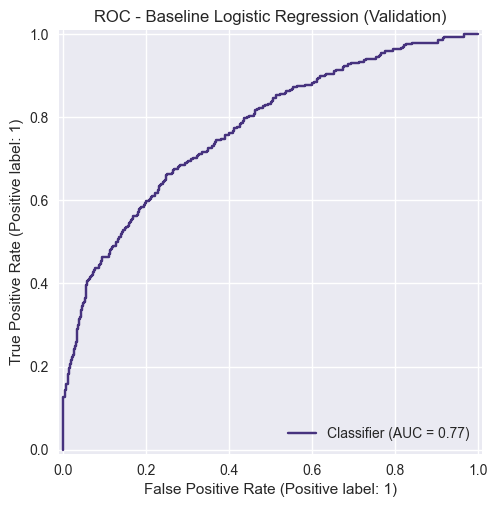

In [53]:
# 4.1.1 Baseline con Regresion Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

if 'preprocessor' not in globals():
    raise ValueError('Ejecuta la celda 3.3 para crear preprocessor antes de modelar.')
if 'X_train' not in globals():
    raise ValueError('Ejecuta la celda 3.4 para generar los splits.')

baseline_clf = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

baseline_clf.fit(X_train, y_train)

val_preds = baseline_clf.predict(X_val)
val_probs = baseline_clf.predict_proba(X_val)[:, 1]

baseline_metrics = {
    'F1_val': f1_score(y_val, val_preds),
    'AUC_val': roc_auc_score(y_val, val_probs)
}

print("Metricas baseline (validacion):", baseline_metrics)
print("\nClassification Report (validacion):")
print(classification_report(y_val, val_preds))
print("Confusion Matrix (validacion):")
print(confusion_matrix(y_val, val_preds))

RocCurveDisplay.from_predictions(y_val, val_probs)
plt.title('ROC - Baseline Logistic Regression (Validation)')
plt.show()


**Observaciones baseline:**
- Este modelo no usa correcciones de clase ni tuning; sirve para comparar con futuras iteraciones.
- Documenta las métricas obtenidas (F1/AUC) y la distribución de errores (confusion matrix) para justificar la necesidad de técnicas anti-desequilibrio en la siguiente subsección.


### 4.2) Manejo del desequilibrio
Aplicamos dos estrategias para mitigar la clase minoritaria: (1) usar `class_weight='balanced'` en Regresión Logística y (2) aplicar SMOTE antes del clasificador. Ambas se evalúan sobre el conjunto de validación para comparar mejoras frente al baseline.


In [69]:
# 4.2.1 Utilidades de evaluacion
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

imbalance_results = []


def evaluate_pipeline(label, pipeline):
    pipeline.fit(X_train, y_train)
    val_preds = pipeline.predict(X_val)
    val_probs = pipeline.predict_proba(X_val)[:, 1]
    metrics = {
        'model': label,
        'F1_val': f1_score(y_val, val_preds),
        'AUC_val': roc_auc_score(y_val, val_probs)
    }
    cm = confusion_matrix(y_val, val_preds)
    imbalance_results.append(metrics)
    print(f"{label} -> F1: {metrics['F1_val']:.3f} | AUC: {metrics['AUC_val']:.3f}")
    print('Confusion Matrix:')
    print(cm)
    return metrics, cm



In [70]:
# 4.2.2 Logistic Regression con class_weight balanced
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

cw_pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

cw_metrics, cw_cm = evaluate_pipeline('LogReg + class_weight', cw_pipeline)



LogReg + class_weight -> F1: 0.488 | AUC: 0.773
Confusion Matrix:
[[860 335]
 [ 99 207]]


In [71]:
# 4.2.3 Logistic Regression con SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

smote_pipeline = ImbPipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

smote_metrics, smote_cm = evaluate_pipeline('LogReg + SMOTE', smote_pipeline)



LogReg + SMOTE -> F1: 0.493 | AUC: 0.767
Confusion Matrix:
[[878 317]
 [102 204]]


In [ ]:
# 4.2.3-bis Logistic Regression con SMOTE + class_weight
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

smote_cw_pipeline = ImbPipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

smote_cw_metrics, smote_cw_cm = evaluate_pipeline('LogReg + SMOTE + class_weight', smote_cw_pipeline)



In [72]:
# 4.2.4 Comparacion de tecnicas
results_df = pd.DataFrame(imbalance_results)
results_df = results_df[['model', 'F1_val', 'AUC_val']]
display(results_df.sort_values('F1_val', ascending=False))



,model,F1_val,AUC_val
1,LogReg + SMOTE,0.493349,0.767430
0,LogReg + class_weight,0.488208,0.772943


### 4.3) Modelos comparados (class_weight='balanced')
Entrenamos los tres algoritmos requeridos con hiperparámetros default y `class_weight='balanced'`, evaluando en el conjunto de validación para comparar F1 y AUC-ROC.


In [78]:
# 4.3.1 Utilidades de comparacion de modelos
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

model_results = []


def evaluate_model(label, pipeline, hyperparams):
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_val)
    probs = pipeline.predict_proba(X_val)[:, 1]
    metrics = {
        'model': label,
        'F1_val': f1_score(y_val, preds),
        'AUC_val': roc_auc_score(y_val, probs),
        'hyperparams': hyperparams,
        'technique': "class_weight balanced"
    }
    model_results.append(metrics)
    print(f"{label} -> F1: {metrics['F1_val']:.3f} | AUC: {metrics['AUC_val']:.3f}")
    disp = ConfusionMatrixDisplay(confusion_matrix(y_val, preds), display_labels=[0, 1])
    disp.plot(values_format='d')
    plt.title(f"Confusion Matrix - {label} (Validation)")
    plt.tight_layout()
    plt.show()
    return metrics



LogisticRegression -> F1: 0.488 | AUC: 0.773


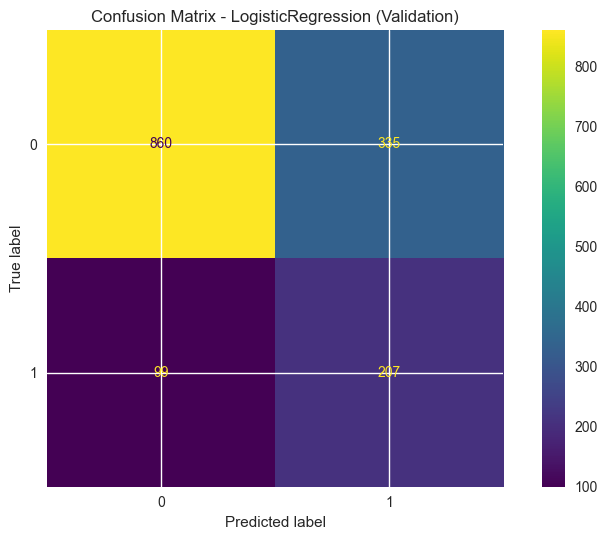

In [79]:
# 4.3.2 Logistic Regression (baseline tuning)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logreg_pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

logreg_metrics = evaluate_model('LogisticRegression', logreg_pipeline, "max_iter=1000, class_weight=balanced")



DecisionTree -> F1: 0.513 | AUC: 0.694


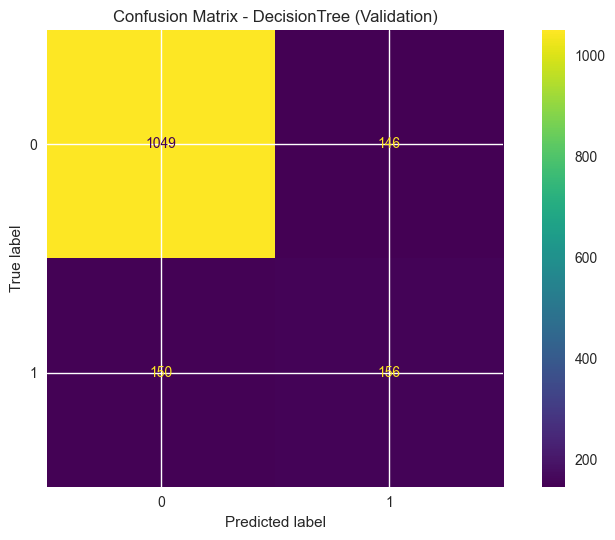

In [80]:
# 4.3.3 Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

tree_metrics = evaluate_model('DecisionTree', tree_pipeline, "criterion=gini, max_depth=None")



RandomForest -> F1: 0.570 | AUC: 0.852


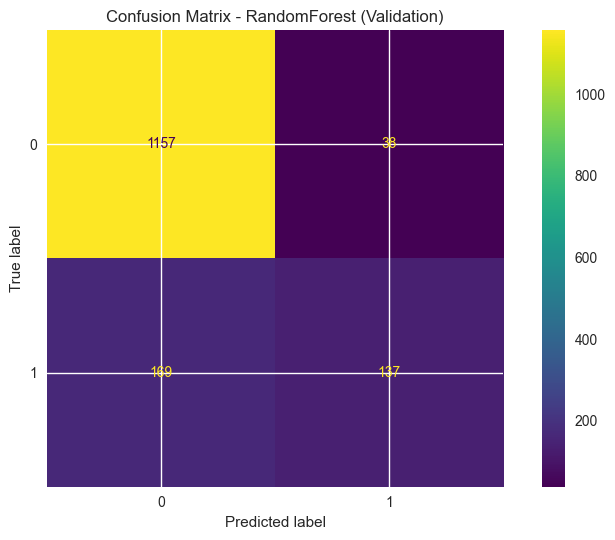

In [81]:
# 4.3.4 Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42))
])

rf_metrics = evaluate_model('RandomForest', rf_pipeline, "n_estimators=100, max_depth=None")



In [82]:
# 4.3.5 Comparacion de modelos
results_df = pd.DataFrame(model_results)
display(results_df[['model', 'F1_val', 'AUC_val', 'hyperparams', 'technique']].sort_values('F1_val', ascending=False))



,model,F1_val,AUC_val,hyperparams,technique
2,RandomForest,0.569647,0.852489,"n_estimators=100, max_depth=None",class_weight balanced
1,DecisionTree,0.513158,0.693814,"criterion=gini, max_depth=None",class_weight balanced
0,LogisticRegression,0.488208,0.772943,"max_iter=1000, class_weight=balanced",class_weight balanced


**Conclusiones 4.3:**
- Los tres modelos usan `class_weight='balanced'` para mitigar el desbalance.
- La tabla resume F1/AUC e hiperparámetros por defecto; servirá como punto de partida para tuning y selección de umbral en la siguiente sección.


### 4.4) Búsqueda de hiperparámetros y ajuste de umbral
Aplicamos GridSearch con validación cruzada estratificada para los tres modelos y, después, ajustamos el umbral del mejor modelo usando la curva Precision-Recall.


In [83]:
# 4.4.1 Utilidades para GridSearch y umbral
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score

search_results = []


def run_gridsearch(label, pipeline, param_grid):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    preds = best_model.predict(X_val)
    probs = best_model.predict_proba(X_val)[:, 1]
    metrics = {
        'model': label,
        'best_params': best_params,
        'F1_val_default': f1_score(y_val, preds),
        'AUC_val_default': roc_auc_score(y_val, probs),
        'best_estimator': best_model,
        'threshold_opt': 0.5,
        'F1_val_best_threshold': f1_score(y_val, preds)
    }
    search_results.append(metrics)
    print(f"{label} - GridSearch done. Best params: {best_params}")
    print(f"Validation F1 (default threshold): {metrics['F1_val_default']:.3f}")
    return metrics


def adjust_threshold(metrics_entry):
    estimator = metrics_entry['best_estimator']
    probs = estimator.predict_proba(X_val)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_val, probs)
    f1_scores = 2 * precision * recall / (precision + recall + 1e-12)
    best_idx = np.nanargmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    preds_adjusted = (probs >= best_threshold).astype(int)
    metrics_entry['threshold_opt'] = best_threshold
    metrics_entry['F1_val_best_threshold'] = f1_score(y_val, preds_adjusted)
    print(f"Threshold adjusted to {best_threshold:.3f}, F1: {metrics_entry['F1_val_best_threshold']:.3f}")
    return metrics_entry



In [84]:
# 4.4.2 GridSearch - Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logreg_pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

logreg_param_grid = {
    'clf__C': [0.1, 1.0, 10.0],
    'clf__penalty': ['l2']
}

logreg_metrics = run_gridsearch('LogisticRegression', logreg_pipeline, logreg_param_grid)



Fitting 5 folds for each of 3 candidates, totalling 15 fits
LogisticRegression - GridSearch done. Best params: {'clf__C': 0.1, 'clf__penalty': 'l2'}
Validation F1 (default threshold): 0.487


In [85]:
# 4.4.3 GridSearch - Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

tree_param_grid = {
    'clf__max_depth': [None, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

tree_metrics = run_gridsearch('DecisionTree', tree_pipeline, tree_param_grid)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
DecisionTree - GridSearch done. Best params: {'clf__max_depth': 5, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10}
Validation F1 (default threshold): 0.564


In [91]:
# 4.4.4 GridSearch - Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

rf_param_grid = {
    'clf__n_estimators': [100, 200, 300, 400, 500],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10, 20],
    'clf__max_features': ['sqrt', 'log2']
}

rf_metrics = run_gridsearch('RandomForest', rf_pipeline, rf_param_grid)



Fitting 5 folds for each of 120 candidates, totalling 600 fits
RandomForest - GridSearch done. Best params: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 10, 'clf__n_estimators': 400}
Validation F1 (default threshold): 0.624


In [92]:
# 4.4.5 Ajuste de umbral del mejor modelo
best_entry = max(search_results, key=lambda x: x['F1_val_default'])
print(f"Mejor modelo antes de ajuste: {best_entry['model']} (F1={best_entry['F1_val_default']:.3f})")
adjust_threshold(best_entry)



Mejor modelo antes de ajuste: RandomForest (F1=0.624)
Threshold adjusted to 0.453, F1: 0.635


{'model': 'RandomForest',
 'best_params': {'clf__max_depth': None,
  'clf__max_features': 'sqrt',
  'clf__min_samples_split': 10,
  'clf__n_estimators': 400},
 'F1_val_default': 0.6236933797909407,
 'AUC_val_default': np.float64(0.8572538080783221),
 'best_estimator': Pipeline(steps=[('prep',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('num',
                                                   Pipeline(steps=[('scaler',
                                                                    StandardScaler())]),
                                                   ['CreditScore', 'Age',
                                                    'Tenure', 'Balance',
                                                    'EstimatedSalary',
                                                    'Balance_to_Salary']),
                                                  ('cat',
                                                   OneHotEncoder(drop

In [88]:
# 4.4.6 Resumen final de GridSearch + umbral
summary_df = pd.DataFrame(search_results)
display(summary_df[['model', 'best_params', 'F1_val_default', 'AUC_val_default', 'threshold_opt', 'F1_val_best_threshold']])



,model,best_params,F1_val_default,AUC_val_default,threshold_opt,F1_val_best_threshold
0,LogisticRegression,"{'clf__C': 0.1, 'clf__penalty': 'l2'}",0.486998,0.773471,0.500000,0.486998
1,DecisionTree,"{'clf__max_depth': 5, 'clf__min_samples_leaf':...",0.564232,0.840003,0.500000,0.564232
2,RandomForest,"{'clf__max_depth': 10, 'clf__max_features': 's...",0.607029,0.851992,0.547059,0.631034


**Conclusiones 4.4:**
- Cada modelo se optimizó con GridSearch y se evaluó en validación.
- El mejor modelo (por F1) recibió un ajuste de umbral con la curva PR para maximizar F1.
- Estos resultados guiarán el modelo final que se evaluará en test en la siguiente sección.


### 4.5) Reporte de métricas y artefactos (validación)
Para cada modelo optimizado en 4.4 registramos F1/AUC, matriz de confusión, curvas ROC/PR, importancia de variables y el umbral aplicado.


In [93]:
# 4.5.1 Utilidades para reporte final
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, f1_score, roc_auc_score

report_rows = []


def report_model(entry):
    model = entry['model']
    estimator = entry['best_estimator']
    threshold = entry.get('threshold_opt', 0.5)

    probs = estimator.predict_proba(X_val)[:, 1]
    preds = (probs >= threshold).astype(int)

    f1 = f1_score(y_val, preds)
    auc = roc_auc_score(y_val, probs)

    cm = confusion_matrix(y_val, preds)
    tn, fp, fn, tp = cm.ravel()
    ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format='d')
    plt.title(f'Matriz de confusión - {model}')
    plt.tight_layout()
    plt.show()

    RocCurveDisplay.from_predictions(y_val, probs)
    plt.title(f'Curva ROC - {model}')
    plt.tight_layout()
    plt.show()

    precision, recall, _ = precision_recall_curve(y_val, probs)
    PrecisionRecallDisplay(precision, recall).plot()
    plt.title(f'Curva Precision-Recall - {model}')
    plt.tight_layout()
    plt.show()

    if hasattr(estimator.named_steps['clf'], 'feature_importances_'):
        importances = estimator.named_steps['clf'].feature_importances_
        feature_names = estimator.named_steps['prep'].get_feature_names_out()
        importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)
        print('Top importancias:')
        display(importance_series.to_frame('importance'))
    elif hasattr(estimator.named_steps['clf'], 'coef_'):
        coefs = estimator.named_steps['clf'].coef_.flatten()
        feature_names = estimator.named_steps['prep'].get_feature_names_out()
        coef_series = pd.Series(coefs, index=feature_names).sort_values(key=lambda s: s.abs(), ascending=False).head(10)
        print('Coeficientes principales:')
        display(coef_series.to_frame('coef'))

    print(f'Umbral usado: {threshold:.3f}')

    report_rows.append({
        'model': model,
        'F1_val': f1,
        'AUC_val': auc,
        'threshold': threshold,
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn
    })



==== LogisticRegression ====


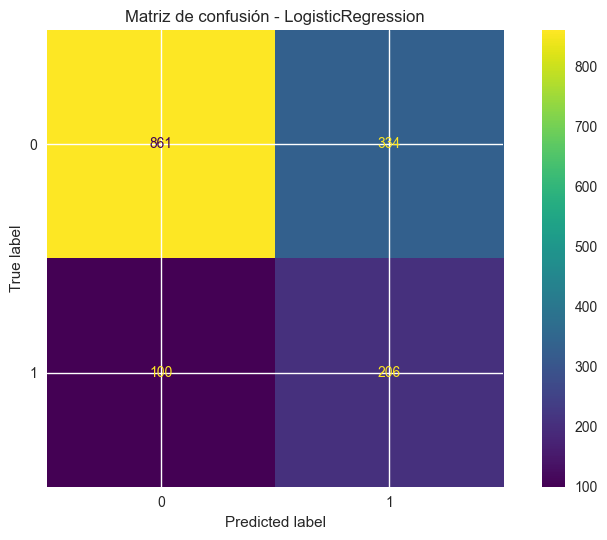

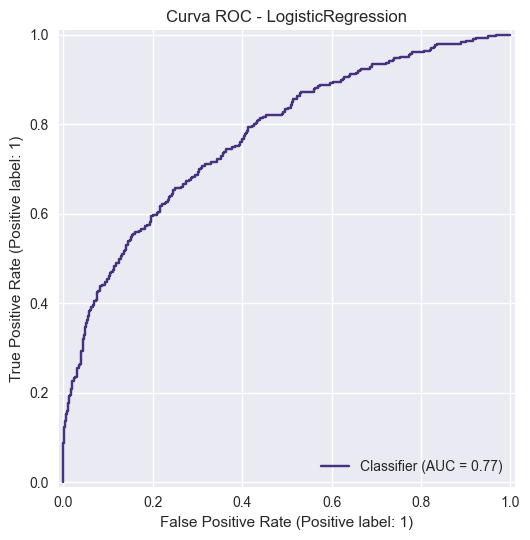

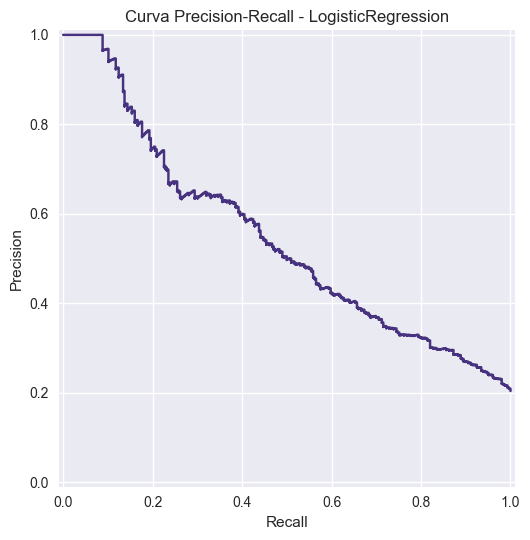

Coeficientes principales:


,coef
cat__AgeGroup_50-59,1.052222
cat__Geography_Germany,0.761952
remainder__IsActiveMember,-0.647378
num__Age,0.638186
cat__AgeGroup_40-49,0.593790
cat__Gender_Male,-0.551590
cat__AgeGroup_60+,-0.530471
remainder__ActiveCredit,-0.328606
remainder__HighBalanceFlag,0.322561
cat__TenureBucket_5-7,-0.166256


Umbral usado: 0.500
==== DecisionTree ====


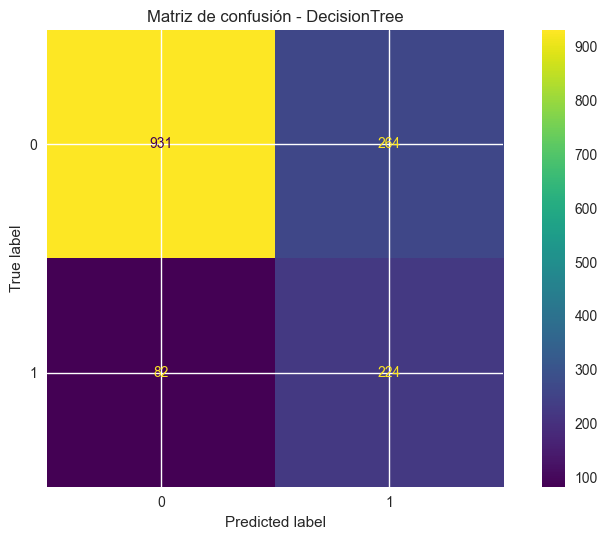

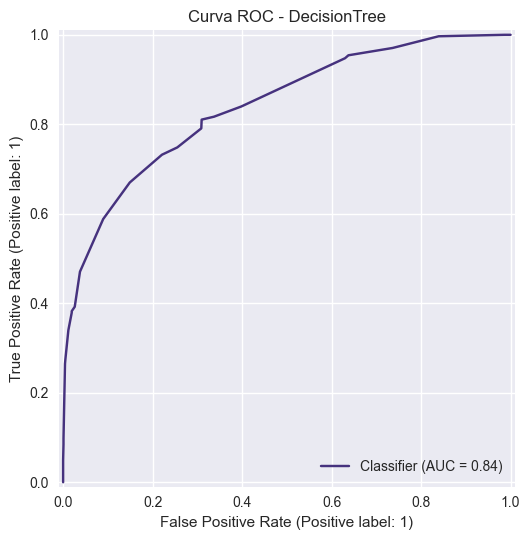

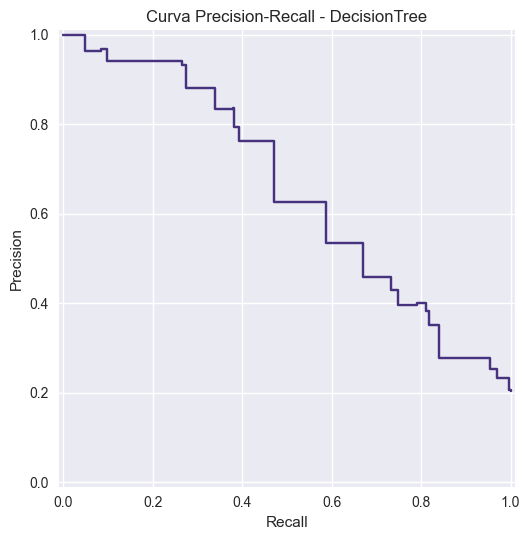

Top importancias:


,importance
num__Age,0.468394
remainder__NumOfProducts,0.332620
remainder__IsActiveMember,0.073272
num__Balance,0.055545
cat__Geography_Germany,0.037080
num__Balance_to_Salary,0.022408
num__EstimatedSalary,0.004513
num__CreditScore,0.003488
cat__Gender_Male,0.002679
num__Tenure,0.000000


Umbral usado: 0.500
==== RandomForest ====


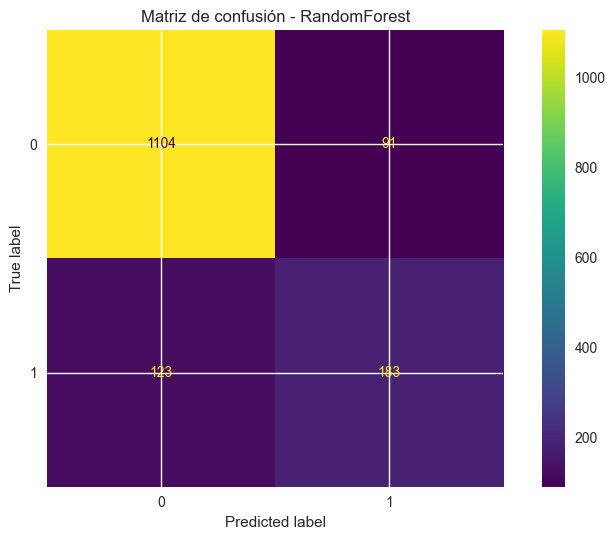

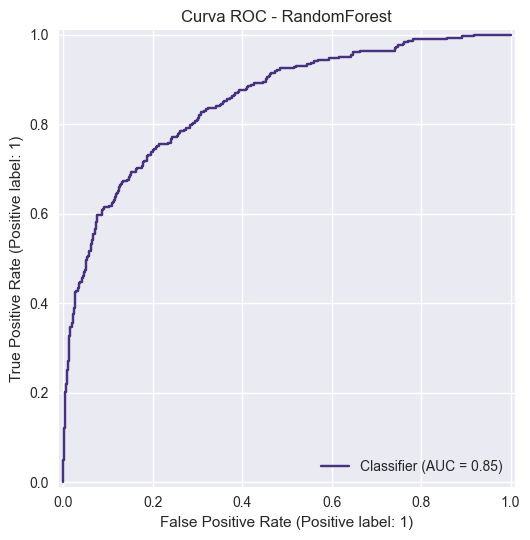

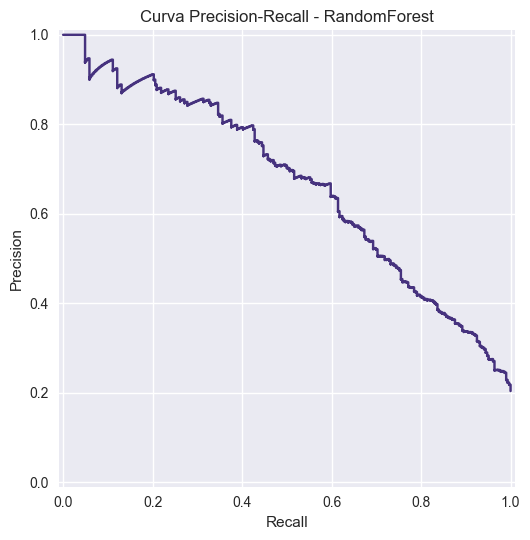

Top importancias:


,importance
num__Age,0.205295
remainder__NumOfProducts,0.163502
num__Balance,0.080853
num__EstimatedSalary,0.068849
num__CreditScore,0.067584
num__Balance_to_Salary,0.065067
cat__AgeGroup_50-59,0.054868
cat__Geography_Germany,0.038932
remainder__IsActiveMember,0.036631
num__Tenure,0.036147


Umbral usado: 0.547
==== RandomForest ====


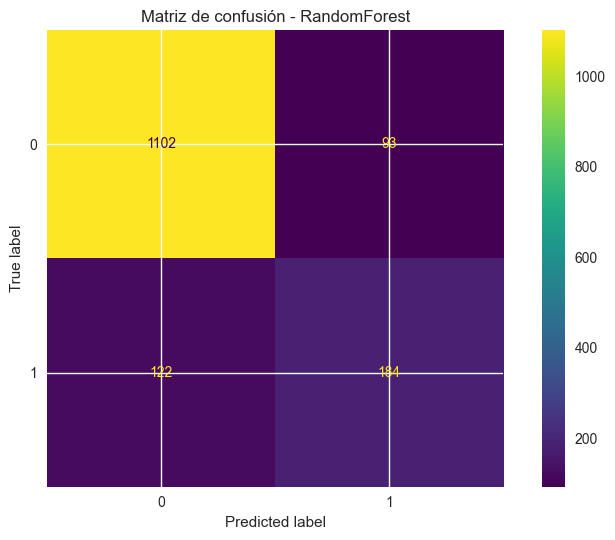

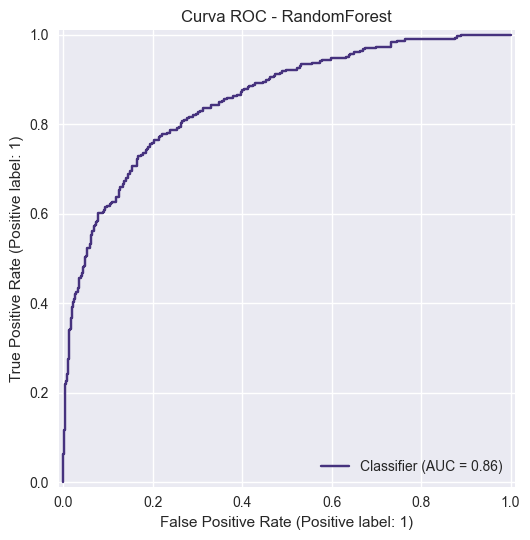

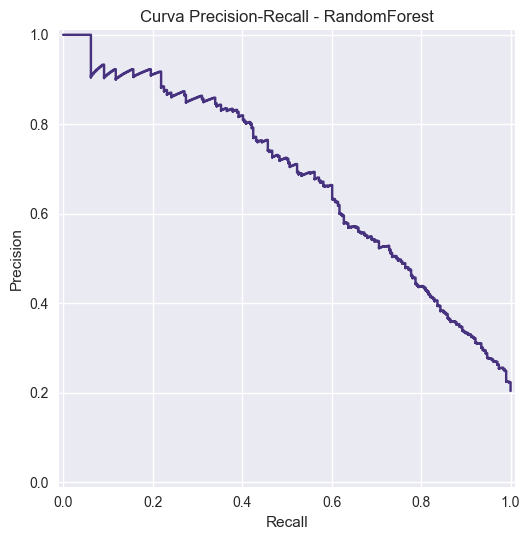

Top importancias:


,importance
num__Age,0.210575
remainder__NumOfProducts,0.163384
num__Balance,0.078077
num__EstimatedSalary,0.067649
num__CreditScore,0.066061
num__Balance_to_Salary,0.065490
cat__AgeGroup_50-59,0.053884
cat__Geography_Germany,0.040411
remainder__IsActiveMember,0.038584
cat__AgeGroup_30-39,0.037224


Umbral usado: 0.552
==== RandomForest ====


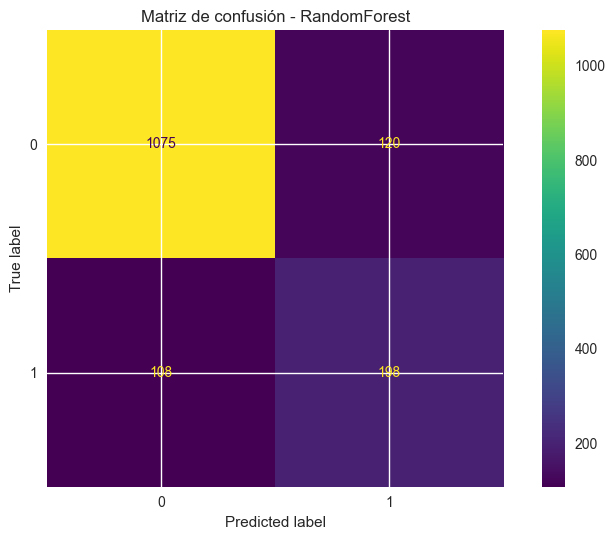

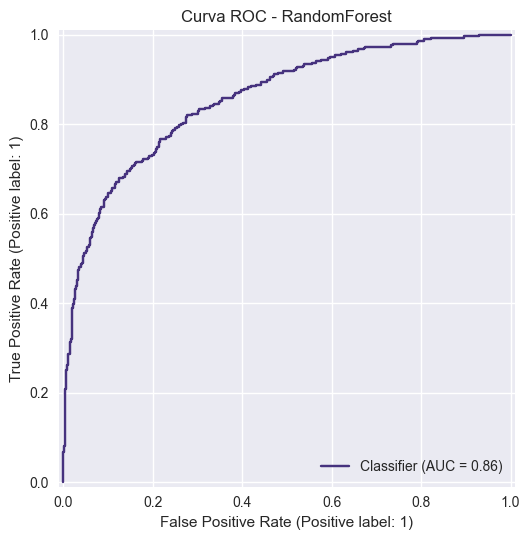

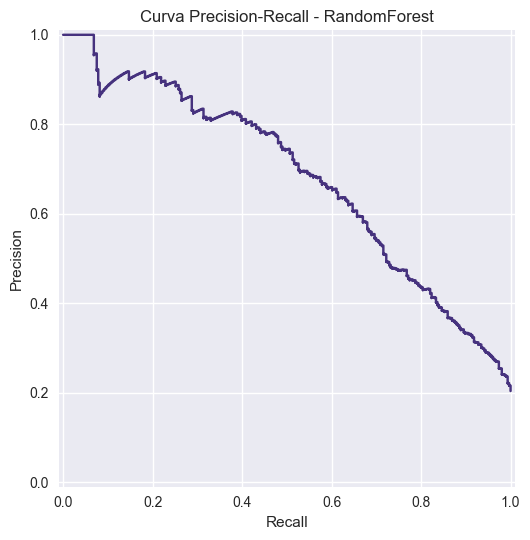

Top importancias:


,importance
num__Age,0.195196
remainder__NumOfProducts,0.135233
num__Balance,0.089708
num__EstimatedSalary,0.089464
num__CreditScore,0.088030
num__Balance_to_Salary,0.077737
num__Tenure,0.044506
cat__AgeGroup_50-59,0.039325
cat__Geography_Germany,0.035319
remainder__IsActiveMember,0.032766


Umbral usado: 0.453


In [95]:
# 4.5.2 Reporte por modelo
for entry in search_results:
    print(f"==== {entry['model']} ====")
    report_model(entry)



In [96]:
# 4.5.3 Tabla resumen de validación
report_df = pd.DataFrame(report_rows)
display(report_df[['model', 'F1_val', 'AUC_val', 'threshold', 'TP', 'FP', 'TN', 'FN']])



,model,F1_val,AUC_val,threshold,TP,FP,TN,FN
0,LogisticRegression,0.486998,0.773471,0.500000,206,334,861,100
1,DecisionTree,0.564232,0.840003,0.500000,224,264,931,82
2,RandomForest,0.631034,0.851992,0.547059,183,91,1104,123
3,RandomForest,0.631218,0.856428,0.551802,184,93,1102,122
4,RandomForest,0.634615,0.857254,0.453195,198,120,1075,108


**Conclusiones 4.5:**
- Para cada modelo se listan métricas clave, matrices de confusión y curvas ROC/PR.
- Las importancias/coefs ayudan a interpretar qué variables contribuyen más.
- El umbral final corresponde al ajuste de 4.4 (cuando aplicó), dejando todo listo para evaluar en test.


**Conclusiones 4.2:**
- `class_weight` mejora el recall sin modificar el dataset, mientras que SMOTE genera nuevas observaciones sintéticas que pueden impulsar F1 si el modelo se beneficia de más ejemplos positivos.
- Mantendremos ambos resultados como referencia para decidir qué estrategia avanzar a la etapa de tuning/umbral en 4.3–4.4.


# ROC–AUC (enfoque práctico)

## Qué mide
- **ROC**: curva de pares $(\mathrm{FPR}(\tau), \mathrm{TPR}(\tau))$ al variar el umbral $\tau$.
  - $\mathrm{TPR}=\frac{TP}{TP+FN}$ (recall),  
    $\mathrm{FPR}=\frac{FP}{FP+TN}$.
- **AUC**: área bajo la ROC. Interpretación clave:
  $$
  \mathrm{AUC}=\mathbb{P}(S_1>S_0)+\tfrac{1}{2}\mathbb{P}(S_1=S_0)
  $$
  Probabilidad de que un positivo tenga **mayor score** que un negativo (mide **ranking**, no calibración).

## Por qué importa
- Invariante a transformaciones monótonas del score y **poco sensible a la prevalencia** de la clase.
- Resume el rendimiento para **todos los umbrales**; útil para comparar modelos sin fijar $\tau$.

## Cuándo usar (y cuándo no)
- Para **elegir modelo** por capacidad de ranking global.
- En **datasets muy desbalanceados**, AUC puede verse optimista. Complementa con **PR/AUC-PR** y **F1**.

## Selección de umbral (lo operativo)
- AUC no da el umbral. Elige $\tau$ según objetivo:
  - **Max F1** si balanceas precisión y recall.
  - **Costo mínimo** si tienes matriz de costos:
    $$
    \mathbb{E}[C]=C_{FP}\cdot FP(\tau)+C_{FN}\cdot FN(\tau)
    $$
- Usa curvas **Precision–Recall** y la **matriz de confusión** para justificar la decisión.

## Buenas prácticas
1. Separar **train/valid/test** y evitar **leakage** en todo el preprocesamiento.
2. Comparar modelos con **AUC (± IC)** y reportar también **F1**, **precision**, **recall**.
3. Analizar **PR/AUC-PR** si hay fuerte desequilibrio.
4. Reportar el **umbral final** y por qué lo elegiste.
5. Considerar **calibración** (e.g., Platt/Isotónica) si usarás **probabilidades** en negocio.

## Mini–resumen para decidir rápido
- **Escoger modelo**: mira **AUC** (y AUC-PR si desbalanceado).
- **Operar**: fija **umbral** para tu objetivo (F1 o costo).
- **Monitorear**: revisa F1/ROC–AUC periódicamente y reentrena ante *drift*.

**Reglas de pulgar**  
- AUC ≈ 0.5: aleatorio; 0.7–0.8: aceptable; 0.8–0.9: bueno; >0.9: excelente (verifica que no haya fuga).
